<a href="https://colab.research.google.com/github/nsriniva/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First a little bit of statistics review:

# Variance

Variance is a measure of the spread of numbers in a dataset. Variance is the average of the squared differences from the mean. So naturally, you can't find the variance of something unless you calculate it's mean first. Lets get some data and find its variance.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Lets generate two variables with 50 random integers each.
variance_one = []
variance_two = []
for x in range(50):
  variance_one.append(random.randint(25,75))
  variance_two.append(random.randint(0,100))
  
variance_data = {'v1': variance_one, 'v2': variance_two}

variance_df = pd.DataFrame(variance_data)
variance_df['zeros'] = pd.Series(list(np.zeros(50)))

variance_df.head()

,v1,v2,zeros
0,25,20,0.0
1,43,85,0.0
2,56,49,0.0
3,66,5,0.0
4,65,73,0.0


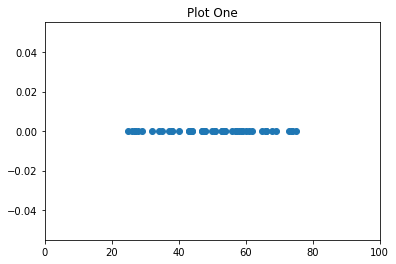

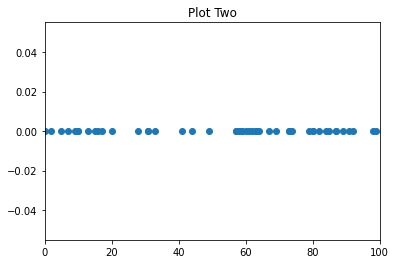

In [ ]:
# Now some scatter plots

plt.scatter(variance_df.v1, variance_df.zeros)
plt.xlim(0,100)
plt.title("Plot One")
plt.show()

plt.scatter(variance_df.v2, variance_df.zeros)
plt.xlim(0,100)
plt.title("Plot Two")
plt.show()

In [ ]:
starting_list = [-5,-4, -3, - 2, -1, 0, 1,3, 2,4, 5]

squares = [x*x for x in starting_list]

squares

[25, 16, 9, 4, 1, 0, 1, 9, 4, 16, 25]

Now I know this isn't complicated, but each of the above plots has the same number of points, but we can tell visually that "Plot Two" has the greater variance because its points are more spread out. What if we didn't trust our eyes though? Lets calculate the variance of each of these variables to prove it to ourselves

$\overline{X}$ is the symbol for the mean of the dataset.

$N$ is the total number of observations.

$v$ or variance is sometimes denoted by a lowercase v. But you'll also see it referred to as $\sigma^{2}$.

\begin{align}
v = \frac{\sum{(X_{i} - \overline{X})^{2}} }{N}
\end{align}

How do we calculate a simple average? We add up all of the values and then divide by the total number of values. this is why there is a sum in the numerator and N in the denomenator. 

However in this calculation, we're not just summing the values like we would if we were calculateing the mean, we are summing the squared difference between each point and the mean. (The squared distance between each point in the mean.)

In [ ]:
# Since we generated these random values in a range centered around 50, that's 
# about where their means should be.

# Find the means for each variable
v1_mean = variance_df.v1.mean()
print("v1 mean: ", v1_mean)
v2_mean = variance_df.v2.mean()
print("v2 mean: ", v2_mean)

# Find the distance between each point and its corresponding mean

variance_df['v1_distance'] = variance_df.v1-v1_mean
variance_df['v2_distance'] = variance_df.v2-v2_mean

variance_df.head()

v1 mean:  50.8
v2 mean:  53.18


,v1,v2,zeros,v1_distance,v2_distance
0,25,20,0.0,-25.8,-33.18
1,43,85,0.0,-7.8,31.82
2,56,49,0.0,5.2,-4.18
3,66,5,0.0,15.2,-48.18
4,65,73,0.0,14.2,19.82


In [ ]:
# Now we'll square the distances from the means
variance_df['v1_squared_distance'] = variance_df.v1_distance**2
variance_df['v2_squared_distance'] = variance_df.v2_distance**2

# Notice that squaring the distances turns all of our negative values into positive ones?

variance_df.head()

,v1,v2,zeros,v1_distance,v2_distance,v1_squared_distance,v2_squared_distance
0,49,39,0.0,-0.24,-7.68,0.0576,58.9824
1,31,81,0.0,-18.24,34.32,332.6976,1177.8624
2,42,67,0.0,-7.24,20.32,52.4176,412.9024
3,72,42,0.0,22.76,-4.68,518.0176,21.9024
4,74,30,0.0,24.76,-16.68,613.0576,278.2224


In [ ]:
# Now we'll sum the squared distances and divide by the number of observations.
observations = len(variance_df)
print("Number of Observations: ", observations)

Variance_One = variance_df.v1_squared_distance.sum()/observations
Variance_Two = variance_df.v2_squared_distance.sum()/observations

print("Variance One: ", Variance_One)
print("Variance Two: ", Variance_Two)

Number of Observations:  50
Variance One:  176.31360000000004
Variance Two:  1032.2644


Woah, so what is the domain of V1 and V2?

Well, V1 goes from 25 to 75 so its range is ~50 and V2 goes from 0 to 100 so its range is about 100

So even though V2 is roughly twice as spread out, how much bigger is its variance than V1?

In [ ]:
print("How many times bigger is Variance_One than Variance_Two? ", Variance_Two/Variance_One)

# About 3.86 times bigger! Why is that? 

How many times bigger is Variance_One than Variance_Two?  5.854706613670187


## A note about my code quality

Why did I go to the trouble of calculating all of that by hand, and add a bunch of extra useless rows to my dataframe? That is some bad code! 

Because I wanted to make sure that you understood all of the parts of the equation. I didn't want the function to be some magic thing that you  put numbers in and out popped a variance. Taking time to understand the equation will reinforce your intuition about the spread of the data. After all, I could have just done this:

In [ ]:
print(variance_df.v1.var(ddof=1))
print(variance_df.v2.var(ddof=1))


196.12244897959184
871.5383673469387


But wait! Those variance values are different than the ones we calculated above, oh no! This is because variance is calculated slightly differently for a population vs a sample. Lets clarify this a little bit. 

The **POPULATION VARIANCE** $\sigma^{2}$ is a **PARAMETER** (aspect, property, attribute, etc) of the population.

The **SAMPLE VARIANCE** $s^{2}$ is a **STATISTIC** (estimated attribute) of the sample.

We use the sample statistic to **estimate** the population parameter.

The sample variance $s^{2}$ is an estimate of the population variance $\sigma^{2}$.

Basically, if you're calculating a **sample** variance, you need to divide by $N-1$ or else your estimate will be a little biased. The equation that we were originally working from is for a **population variance**. 

If we use the ddof=0 parameter (default is ddof=1) in our equation, we should get the same result. "ddof" stands for Denominator Degrees of Freedom.

In [ ]:
print(variance_df.v1.var(ddof=0))
print(variance_df.v2.var(ddof=0))

192.2
854.1075999999999


# Standard Deviation

If you understand how variance is calculated, then standard deviation is a cinch. The standard deviation is the square root $\sqrt()$ of the variance.

## So why would we use one over the other?

Remember how we squared all of the distances from the mean before we added them all up? Well then taking the square root of the variance will put our measures back in the same units as the mean. So the Standard Deviation is a measure of spread of the data that is expressed in the same units as the mean of the data. Variance is the average squared distance from the mean, and the Standard Deviation is the average distance from the mean. You'll remember that when we did hypothesis testing and explored the normal distribution we talked in terms of standard deviations, and not in terms of variance for this reason.

In [ ]:
print(variance_df.v1.std(ddof=0))
print(variance_df.v2.std(ddof=0))

13.863621460498695
29.225119332519412


# Covariance

Covariance is a measure of how changes in one variable are associated with changes in a second variable. It's a measure of how they Co (together) Vary (move) or how they move in relation to each other. For this topic we're not really going to dive into the formula, I just want you to be able to understand the topic intuitively. Since this measure is about two variables, graphs that will help us visualize things in two dimensions will help us demonstrate this idea. (scatterplots)

![Covariance](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2013/12/g-covariance.gif)

Lets look at the first scatterplot. the y variable has high values where the x variable has low values. This is a negative covariance because as one variable increases (moves), the other decreases (moves in the opposite direction).

In the second scatterplot we see no relation between high and low values of either variable, therefore this cloud of points has a near 0 covariance

In the third graph, we see that the y variable takes on low values in the same range where the x value takes on low values, and simiarly with high values. Because the areas of their high and low values match, we would expect this cloud of points to have a positive covariance.

![move opposite](https://activistshub.com/wp-content/uploads/2015/04/I15-43-cosinewave.jpg)

 ![spurious-correlation](https://raw.githubusercontent.com/ryanallredblog/ryanallredblog.github.io/master/img/spurious-correlations.png)

Check out how popular this site is: 

<https://tylervigen.com>

<https://www.similarweb.com/website/tylervigen.com#overview>

## Interpeting Covariance

A large positive or negative covariance indicates a strong relationship between two variables. However, you can't necessarily compare covariances between sets of variables that have a different scale, since the covariance of variables that take on high values will always be higher than  since covariance values are unbounded, they could take on arbitrarily high or low values. This means that you can't compare the covariances between variables that have a different scale. Two variablespositive covariance variable that has a large scale will always have a higher covariance than a variable with an equally strong relationship, yet smaller scale. This means that we need a way to regularlize

One of the challenges with covariance is that its value is unbounded and variables that take on larger values will have a larger covariance irrespective of 

Let me show you what I mean:

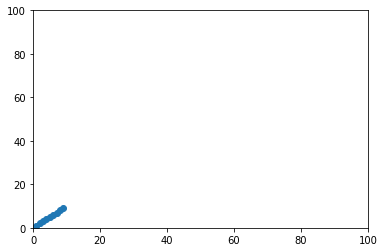

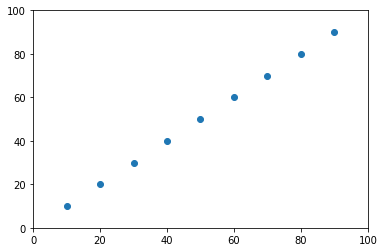

In [ ]:
a = [1,2,3,4,5,6,7,8,9]
b = [1,2,3,4,5,6,7,8,9]
c = [10,20,30,40,50,60,70,80,90]
d = [10,20,30,40,50,60,70,80,90]

fake_data = {"a": a, "b": b, "c": c, "d": d,}

df = pd.DataFrame(fake_data)

plt.scatter(df.a, df.b)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

plt.scatter(df.c, df.d)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

Which of the above sets of variables has a stronger relationship?

Which has the stronger covariance?

# The Variance-Covariance Matrix

In order to answer this problem we're going to use a tool called a variance-covariance matrix. 

This is  matrix that compares each variable with every other variable in a dataset and returns to us variance values along the main diagonal, and covariance values everywhere else. 

In [ ]:
df.cov()

,a,b,c,d
a,7.5,7.5,75.0,75.0
b,7.5,7.5,75.0,75.0
c,75.0,75.0,750.0,750.0
d,75.0,75.0,750.0,750.0


What type of special square matrix is the variance-covariance matrix?

The two sets of variables above show relationships that are equal in their strength, yet their covariance values are wildly different. 

How can we counteract this problem?

What if there was some statistic of a distribution that represented how spread out the data was that we could use to standardize the units/scale of the variables?

# Correlation Coefficient

Well, it just so happens that we do have such a measure of spread of a variable. It's called the Standard Deviation! And we already learned about it. If we divide our covariance values by the product of the standard deviations of the two variables, we'll end up with what's called the Correlation Coefficient. (Sometimes just referred to as the correlation). 

Correlation Coefficients have a fixed range from -1 to +1 with 0 representing no linear relationship between the data. 

In most use cases the correlation coefficient is an improvement over measures of covariance because:

- Covariance can take on practically any number while a correlation is limited: -1 to +1.
- Because of it’s numerical limitations, correlation is more useful for determining how strong the relationship is between the two variables.
- Correlation does not have units. Covariance always has units
- Correlation isn’t affected by changes in the center (i.e. mean) or scale of the variables

[Statistics How To - Covariance](https://www.statisticshowto.datasciencecentral.com/covariance/)

The correlation coefficient is usually represented by a lower case $r$.

\begin{align}
r = \frac{cov(X,Y)}{\sigma_{X}\sigma_{Y}}
\end{align}

In [ ]:
df.corr()

,a,b,c,d
a,1.0,1.0,1.0,1.0
b,1.0,1.0,1.0,1.0
c,1.0,1.0,1.0,1.0
d,1.0,1.0,1.0,1.0


Correlation coefficients of 1 tell us that all of these varaibles have a perfectly linear positive correlation with one another. 

![Correlation-Coefficients](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1200px-Correlation_examples2.svg.png)

Correlation and other sample statistics are somewhat limited in their ability to tell us about the shape/patterns in the data.

[Anscombe's Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

![Anscombe's Quartet](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/850px-Anscombe%27s_quartet_3.svg.png)

Or take it to the next level with the [Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)


# Orthogonality

Orthogonality is another word for "perpendicularity" or things (vectors or matrices) existing at right angles to one another. Two vectors that are perpendicular to one another are orthogonal.

## How to tell if two vectors are orthogonal

Two vectors are orthogonal to each other if their dot product will be zero. 

Lets look at a couple of examples to see this in action:

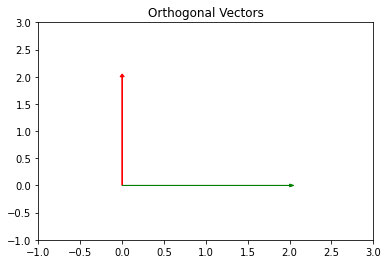

In [ ]:
vector_1 = [0, 2]
vector_2 = [2, 0]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,3)          
plt.ylim(-1,3)
plt.title("Orthogonal Vectors")
plt.show()

Clearly we can see that the above vectors are perpendicular to each other, what does the formula say?

\begin{align}
a = \begin{bmatrix} 0 & 2\end{bmatrix}
\qquad
b = \begin{bmatrix} 2 & 0\end{bmatrix}
\\
a \cdot b = (0)(2) + (2)(0) = 0
\end{align}

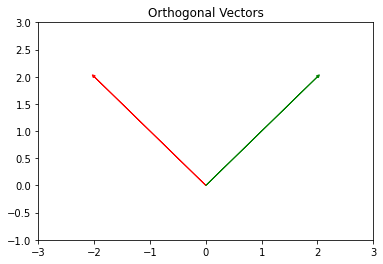

In [ ]:
vector_1 = [-2, 2]
vector_2 = [2, 2]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Orthogonal Vectors")
plt.show()

Again the dot product is zero.

\begin{align}
a = \begin{bmatrix} -2 & 2\end{bmatrix}
\qquad
b = \begin{bmatrix} 2 & 2\end{bmatrix}
\\
a \cdot b = (-2)(2) + (2)(2) = 0
\end{align}


# Unit Vectors

In Linear Algebra a unit vector is any vector of "unit length" (1). You can turn any non-zero vector into a unit vector by dividing it by its norm (length/magnitude).

for example if I have the vector 

\begin{align}
 b = \begin{bmatrix} 1 \\ 2 \\  2 \end{bmatrix}
\end{align}

 and I want to turn it into a unit vector, first I will calculate its norm
 
 \begin{align}
 ||b|| = \sqrt{1^2 + 2^2 + 2^2} = \sqrt{1 + 4 + 4} = \sqrt{9} = 3
\end{align}

I can turn b into a unit vector by dividing it by its norm. Once something has been turned into a unit vector we'll put a ^ "hat" symbol over it to denote that it is now a unit vector.

 \begin{align}
 \hat{b} = \frac{1}{||b||}b = \frac{1}{3}\begin{bmatrix} 1 \\ 2 \\  2 \end{bmatrix} = \begin{bmatrix} \frac{1}{3} \\ \frac{2}{3} \\  \frac{2}{3} \end{bmatrix}
\end{align}

You might frequently see mentioned the unit vectors used to denote a certain dimensional space. 

$\mathbb{R}$ unit vector: $\hat{i} = \begin{bmatrix} 1 \end{bmatrix}$


$\mathbb{R}^2$ unit vectors: $\hat{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$, $\hat{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

$\mathbb{R}^3$ unit vectors: $\hat{i} = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}$, $\hat{j} = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}$,  $\hat{k} = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}$

You'll notice that in the corresponding space, these basis vectors are the rows/columns of the identity matrix.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


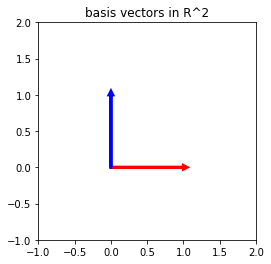

In [ ]:
# Axis Bounds
plt.xlim(-1,2)          
plt.ylim(-1,2)

# Unit Vectors
i_hat = [1,0]
j_hat = [0,1]

# Fix Axes
plt.axes().set_aspect('equal')

# PLot Vectors
plt.arrow(0, 0, i_hat[0], i_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, j_hat[0], j_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.title("basis vectors in R^2")
plt.show()

## Vectors as linear combinations of scalars and unit vectors

Any vector (or matrix) can be be described in terms of a linear combination of scaled unit vectors. Lets look at an example.

\begin{align}
c = \begin{bmatrix} 2 \\ 3 \end{bmatrix}
\end{align}

We think about a vector that starts at the origin and extends to point $(2,3)$

Lets rewrite this in terms of a linear combination of scaled unit vectors:

\begin{align}
c = \begin{bmatrix} 2 \\ 3 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 3\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 2\hat{i} + 3\hat{j}
\end{align}

This says that matrix $\begin{bmatrix} 2 \\ 3 \end{bmatrix}$ will result from scaling the $\hat{i}$ unit vector by 2, the $\hat{j}$ vector by 3 and then adding the two together.

We can describe any vector in $\mathbb{R}^2$ in this way. Well, we can describe any vector in any dimensionality this way provided we use all of the unit vectors for that space and scale them all appropriately. In this examply we just happen to be using a vector whose dimension is 2.

# Span

The span is the set of all possible vectors that can be created with a linear combination of two vectors (just as we described above).

A linear combination of two vectors just means that we're composing to vectors (via addition or subtraction) to create a new vector. 

## Linearly Dependent Vectors

Two vectors that live on the same line are what's called linearly dependent. This means that there is no linear combination (no way to add, or subtract scaled version of these vectors from each other) that will ever allow us to create a vector that lies outside of that line. 

In this case, the span of these vectors (lets say the green one and the red one for example - could be just those two or a whole set) is the line that they lie on, since that's what can be produced by scaling and composing them together.

The span is the graphical area that we're able to cover via a linear combination of a set of vectors.

## Linearly Independent Vectors

Linearly independent vectors are vectors that don't lie on the same line as each other. If two vectors are linearly independent, then there ought to be some linear combination of them that could represent any vector in the space ($\mathbb{R}^2$ in this case).

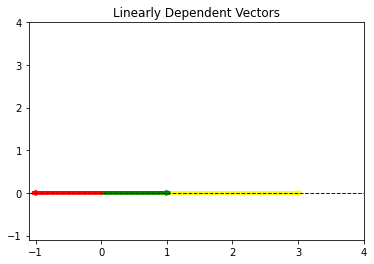

In [ ]:
# Plot Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [1,0] 

# Scaled Vectors
v2 = np.multiply(3, v)
v3 = np.multiply(-1,v)


# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, v3[0], v3[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')


plt.title("Linearly Dependent Vectors")
plt.show()

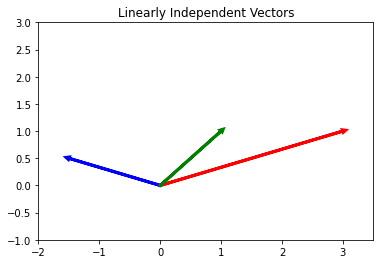

In [ ]:
a = np.array([1,0]) 
b = np.array([0,1])

# Linear Combination
new_vector = a + b 

# Plot Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-2,3.5)          
plt.ylim(-1,3)

# Original Vector
a = [-1.5,.5] 
b = [3, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, new_vector[0], new_vector[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.title("Linearly Independent Vectors")
plt.show()

# Basis

The basis of a vector space $V$ is a set of vectors that are linearly independent and that span the vector space $V$.

A set of vectors spans a space if their linear combinations fill the space.

For example, the unit vectors in the "Linearly Independent Vectors" plot above form a basis for the vector space $\mathbb{R}^2$ becayse they are linearly independent and span that space.

## Orthogonal Basis

An orthogonal basis is a set of vectors that are linearly independent, span the vector space, and are orthogonal to each other. Remember that vectors are orthogonal if their dot product equals zero.

## Orthonormal Basis

An orthonormal basis is a set of vectors that are linearly independent, span the vector space, are orthogonal to eachother and each have unit length. 

For more on this topic (it's thrilling, I know) you might research the Gram-Schmidt process -which is a method for orthonormalizing a set of vectors in an inner product space.

The unit vectors form an orthonormal basis for whatever vector space that they are spanning.

# Rank

The rank of a matrix is the dimension of the vector space spanned by its columns. Just because a matrix has a certain number of rows or columns (dimensionality) doesn't neccessarily mean that it will span that dimensional space. Sometimes there exists a sort of redundancy within the rows/columns of a matrix (linear dependence) that becomes apparent when we reduce a matrix to row-echelon form via Gaussian Elimination.

## Gaussian Elimination 

Gaussian Elimination is a process that seeks to take any given matrix and reduce it down to what is called "Row-Echelon form." A matrix is in Row-Echelon form when it has a 1 as its leading entry (furthest left) in each row, and zeroes at every position below that main entry. These matrices will usually wind up as a sort of upper-triangular matrix (not necessarly square) with ones on the main diagonal. 

![row-echelon form](http://www.mathwords.com/r/r_assets/r61.gif)

Gaussian Elimination takes a matrix and converts it to row-echelon form by doing combinations of three different row operations:

1) You can swap any two rows

2) You can multiply entire rows by scalars

3) You can add/subtract rows from each other

This takes some practice to do by hand but once mastered becomes the fastest way to find the rank of a matrix.

For example lets look at the following matrix:

\begin{align}
 P = \begin{bmatrix}
  1 & 0 & 1 \\
  -2 & -3 & 1 \\
  3 & 3 & 0 
 \end{bmatrix}
\end{align}

Now, lets use gaussian elimination to get this matrix in row-echelon form

Step 1: Add 2 times the 1st row to the 2nd row

\begin{align}
 P = \begin{bmatrix}
  1 & 0 & 1 \\
  0 & -3 & -3 \\
  3 & 3 & 0 
 \end{bmatrix}
\end{align}

Step 2: Add -3 times the 1st row to the 3rd row

\begin{align}
 P = \begin{bmatrix}
  1 & 0 & 1 \\
  0 & -3 & 3 \\
  0 & 3 & -3 
 \end{bmatrix}
\end{align}

Step 3: Multiply the 2nd row by -1/3

\begin{align}
 P = \begin{bmatrix}
  1 & 0 & 1 \\
  0 & 1 & -1 \\
  0 & 3 & -3 
 \end{bmatrix}
\end{align}

Step 4: Add -3 times the 2nd row to the 3rd row

\begin{align}
 P = \begin{bmatrix}
  1 & 0 & 1 \\
  0 & 1 & -1 \\
  0 & 0 & 0 
 \end{bmatrix}
\end{align}

Now that we have this in row-echelon form we can see that we had one row that was linearly dependent (could be composed as a linear combination of other rows). That's why we were left with a row of zeros in place of it. If we look closely we will see that the first row equals the second row plus the third row. 

Because we had two rows with leading 1s (these are called pivot values) left after the matrix was in row-echelon form, we know that its Rank is 2. 

What does this mean? This means that even though the original matrix is a 3x3 matrix, it can't span $\mathbb{R}^3$, only $\mathbb{R}^2$

# Linear Projections in $\mathbb{R}^{2}$

Assume that we have some line $L$ in $\mathbb{R}^{2}$.

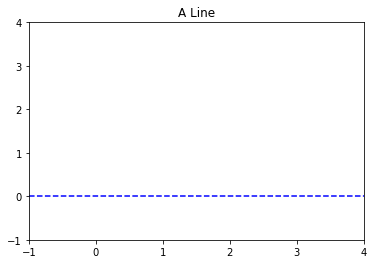

In [ ]:
# Plot a line
plt.xlim(-1,4)          
plt.ylim(-1,4)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals
plt.plot(x_vals, y_vals, '--', color='b')
plt.title("A Line")
plt.show()

We know that if we have a vector $v$ that lies on that line, if we scale that vector in any direction, the resulting vectors can only exist on that line.

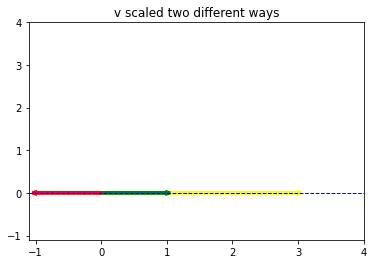

In [ ]:
# Plot a line

# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [1,0] 

# Scaled Vectors
v2 = np.multiply(3, v)
v3 = np.multiply(-1,v)

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, v3[0], v3[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("v scaled two different ways")
plt.show()

Lets call the green vector $v$

This means that line $L$ is equal to vector $v$ scaled by all of the potential scalars in $\mathbb{R}$. We can represent this scaling factor by a constant $c$. Therefore, line $L$ is vector $v$ scaled by any scalar $c$.

\begin{align}
L = cv
\end{align}

Now, say that we have a second vector $w$ that we want to "project" onto line L

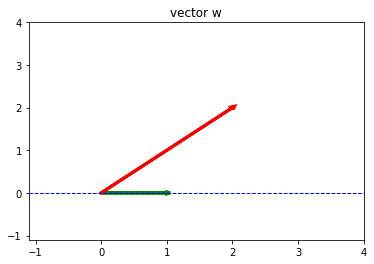

In [ ]:
# Plot a line

# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [1,0] 
w = [2,2]

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("vector w")
plt.show()

## Projection as a shadow cast onto the target vector at a right angle

This is the intuition that I want you to develop. Imagine that we are shining a light down onto lin $L$ from a direction that is exactly orthogonal to it. In this case shining a light onto $L$ from a direction that is orthogonal to it is as if we were shining a light down from directly above. How long will the shadow be?

Imagine that you're **projecting** light from above to cast a shadow onto the x-axis.

Well since $L$ is literally the x-axis you can probably tell that the length of the projection of $w$ onto $L$ is 2.

A projection onto an axis is the same as just setting the variable that doesn't match the axis to 0. in our case the coordinates of vector $w$ is $(2,2)$ so it projects onto the x-axis at (2,0) -> just setting the y value to 0.

### Notation

In linear algebra we write the projection of w onto L like this: 

\begin{align}proj_{L}(\vec{w})\end{align}

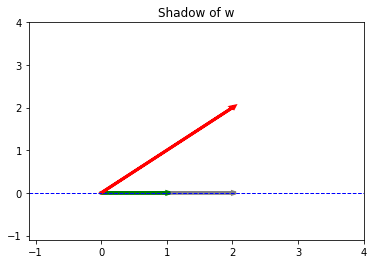

In [ ]:
# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [1,0] 
w = [2,2]
proj = [2,0]

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Shadow of w")
plt.show()

The problem here is that we can't just draw a vector and call it a day, we can only define that vector in terms of our $v$ (green) vector.

Our gray vector is defined as:

\begin{align}
cv = proj_{L}(w)
\end{align}

But what if $L$ wasn't on the x-axis? How would calculate the projection?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


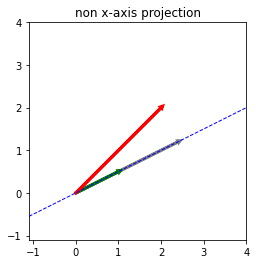

In [ ]:
# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [1,1/2] 
w = [2,2]
proj = np.multiply(2.4,v)

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 1/2*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("non x-axis projection")
plt.show()

Remember, that it doesn't matter how long our $v$ (green) vectors is, we're just looking for the c value that can scale that vector to give us the gray vector $proj_{L}(w)$. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


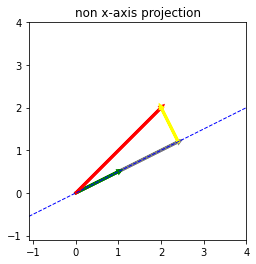

In [ ]:
# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [1,1/2] 
w = [2,2]
proj = np.multiply(2.4,v)
x_minus_proj = w-proj

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 1/2*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(proj[0], proj[1], x_minus_proj[0], x_minus_proj[1], linewidth=3, head_width=.05, head_length=0.05, color = 'yellow')

plt.title("non x-axis projection")
plt.show()

Lets use a trick. We're going to imagine that there is yellow vector that is orthogonal to $L$, that starts at the tip of our projection (gray) and ends at the tip of $w$ (red).

### Here's the hard part

This may not be intuitive, but we can define that yellow vector as $w-proj_{L}(w)$. Remember how two vectors added together act like we had placed one at the end of the other? Well this is the opposite, if we take some vector and subtract another vector, the tip moves to the end of the subtracted vector.

Since we defined $proj_{L}(w)$ as $cv$ (above). We then rewrite the yellow vector as:

\begin{align}
yellow = w-cv
\end{align}

Since we know that our yellow vector is orthogonal to $v$ we can then set up the following equation:

\begin{align}
v \cdot (w-cv) = 0
\end{align}

(remember that the dot product of two orthogonal vectors is 0)

Now solving for $c$ we get

1) Distribute the dot product

\begin{align}
v \cdot w - c(v \cdot v) = 0
\end{align} 

2) add $c(v \cdot v)$ to both sides

\begin{align}
v \cdot w = c(v \cdot v)
\end{align} 

3) divide by $v \cdot v$

\begin{align}
c = \frac{w \cdot v}{v \cdot v}
\end{align}

Since $cv = proj_{L}(w)$ we know that: 

\begin{align}
proj_{L}(w) =  \frac{w \cdot v}{v \cdot v}v
\end{align}

This is the equation for the projection of any vector $w$ onto any line $L$!

Think about if we were trying to project an already orthogonal vector onto a line:

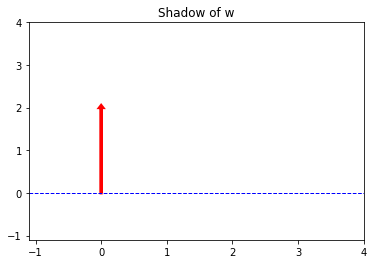

In [ ]:
# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
# v = [1,0] 
w = [0,2]
proj = [2,0]

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Shadow of w")
plt.show()

Now that you have a feel for linear projections, you can see that the $proj_{L}(w)$ is 0 mainly because $w \cdot v$ is 0.

Why have I gone to all of this trouble to explain linear projections? Because I think the intuition behind it is one of the most important things to grasp in linear algebra. We can find the shortest distance between some data point (vector) and a line best via an orthogonal projection onto that line. We can now move data points onto any given line and be certain that they move as little as possible from their original position. 


The square of the norm of a vector is equivalent to the dot product of a vector with itself. 

The dot product of a vector and itself can be rewritten as that vector times the transpose of itself. 